In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("26-customer_data.csv")

In [3]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


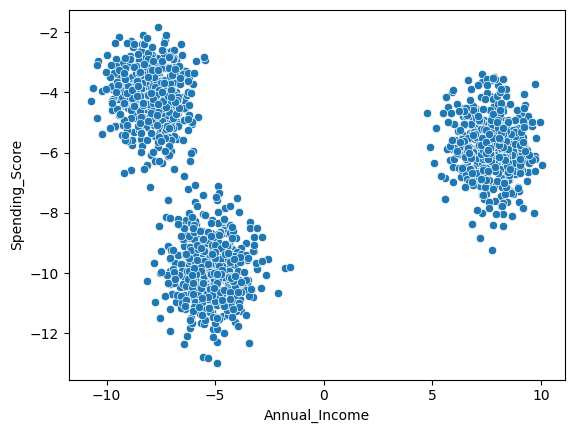

In [8]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=15)

In [12]:
from sklearn.preprocessing import  MinMaxScaler

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.cluster import KMeans

In [22]:
#elbow method
wcss = []

for k in range (1,11):
    kmeans =  KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [23]:
wcss

[196.92068784710153,
 68.44836482219307,
 11.697030239519934,
 9.899873059953947,
 8.100719286204615,
 6.089644206373763,
 6.8319023664563145,
 5.161221787231291,
 4.613049607414267,
 4.024130957769652]

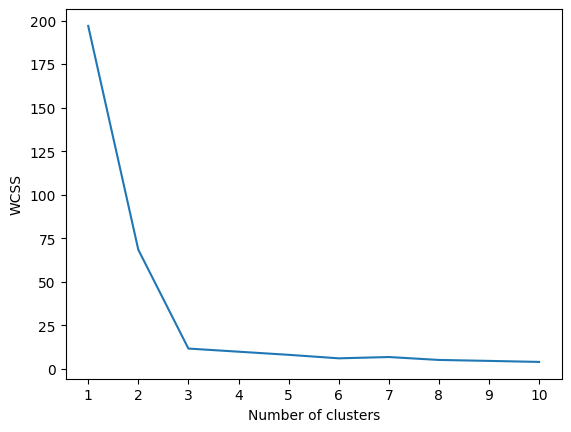

In [26]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [29]:
y_pred = kmeans.predict(X_test_scaled)

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

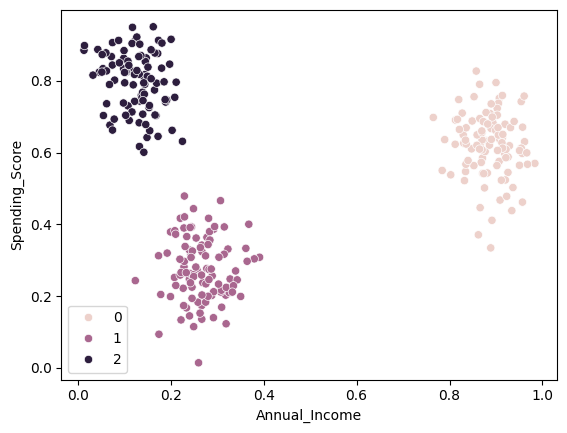

In [30]:
sns.scatterplot(data=pd.DataFrame(X_test_scaled, columns= X_test.columns), x='Annual_Income', y='Spending_Score', hue=y_pred)

In [33]:
!pip install kneed

In [34]:
from kneed import KneeLocator

In [35]:
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [36]:
kl.elbow

np.int64(3)

In [40]:
# silhouette score

In [41]:
from sklearn.metrics import silhouette_score    

In [47]:
silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\irm\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [48]:
silhouette_scores

[0.6538372460771634,
 0.7856941696336582,
 0.653456244381361,
 0.5110353307041757,
 0.3942759237049399,
 0.38174529308268784,
 0.3504384893890175,
 0.3427916651948115,
 0.346747725311125]

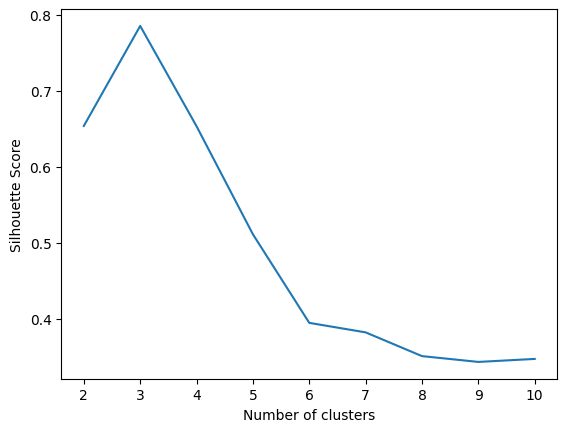

In [49]:
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,11))
plt.show()